In [11]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Metodo con il contesto `with` (raccomandato)
file_path = "/home/acarugat/DiscorsoMattarellaFine2023.txt"

# Leggi il contenuto del file
with open(file_path, 'r', encoding='utf-8') as file:
    testo = file.read()

#print(testo)  # Stampa il contenuto del file

# Pulizia del testo
stop_words = set(stopwords.words('italian'))
tokens = word_tokenize(testo.lower())
tokens_puliti = [word for word in tokens if word not in stop_words and word not in string.punctuation]

#print(tokens_puliti)


In [12]:
from gensim.models import Word2Vec

# Addestramento di Word2Vec
model = Word2Vec([tokens_puliti], vector_size=100, window=5, min_count=3, max_vocab_size=100, workers=4)
print (model)

# Salva il modello
model.save("word2vec_model")


Word2Vec<vocab=67, vector_size=100, alpha=0.025>


In [13]:
# Parole simili
parole_simili = model.wv.most_similar('pace', topn=5)
print(parole_simili)


[('prima', 0.19331957399845123), ('repubblica', 0.1902991235256195), ('dobbiamo', 0.18836373090744019), ('spesso', 0.16936789453029633), ('ascoltare', 0.1690194457769394)]


In [14]:
# Ottieni le parole nel vocabolario e le loro frequenze
parole = model.wv.index_to_key[:100]  # Prime 100 parole più frequenti

# Stampa le parole con le loro frequenze
print("Parola - Frequenza")
for parola in parole:
    frequenza = model.wv.get_vecattr(parola, "count")  # Frequenza della parola
    print(f"{parola} - {frequenza}")


# Ottieni i vettori corrispondenti
vettori = [model.wv[word] for word in parole]

Parola - Frequenza
’ - 35
pace - 11
significa - 10
violenza - 9
– - 8
libertà - 7
futuro - 6
donne - 6
vita - 6
sempre - 6
italia - 6
persone - 5
rispetto - 5
società - 5
ascoltare - 5
penso - 5
lavoro - 5
diritto - 5
spesso - 4
guerra - 4
famiglie - 4
progresso - 4
repubblica - 4
d - 4
uomini - 4
tante - 4
diritti - 4
prima - 4
valori - 4
sicurezza - 4
ragazzi - 4
giovani - 4
cultura - 4
guerre - 4
dignità - 3
ogni - 3
bambini - 3
nuove - 3
tanti - 3
sovente - 3
anno - 3
odio - 3
mondo - 3
corso - 3
unità - 3
affermare - 3
civiltà - 3
comunità - 3
partecipare - 3
civile - 3
solidarietà - 3
dobbiamo - 3
stato - 3
difficoltà - 3
giorno - 3
indifferenza - 3
esercizio - 3
mentalità - 3
così - 3
armi - 3
nasce - 3
oggi - 3
generazioni - 3
accade - 3
rischio - 3
umana - 3
fronte - 3


In [15]:
import numpy as np

def vettore_medio(parole, modello):
    vettori = [modello.wv[word] for word in parole if word in modello.wv]
    return np.mean(vettori, axis=0) if vettori else np.zeros(modelo.vector_size)

# Calcola il vettore medio per un documento
vettore_doc = vettore_medio(tokens_puliti, model)


67


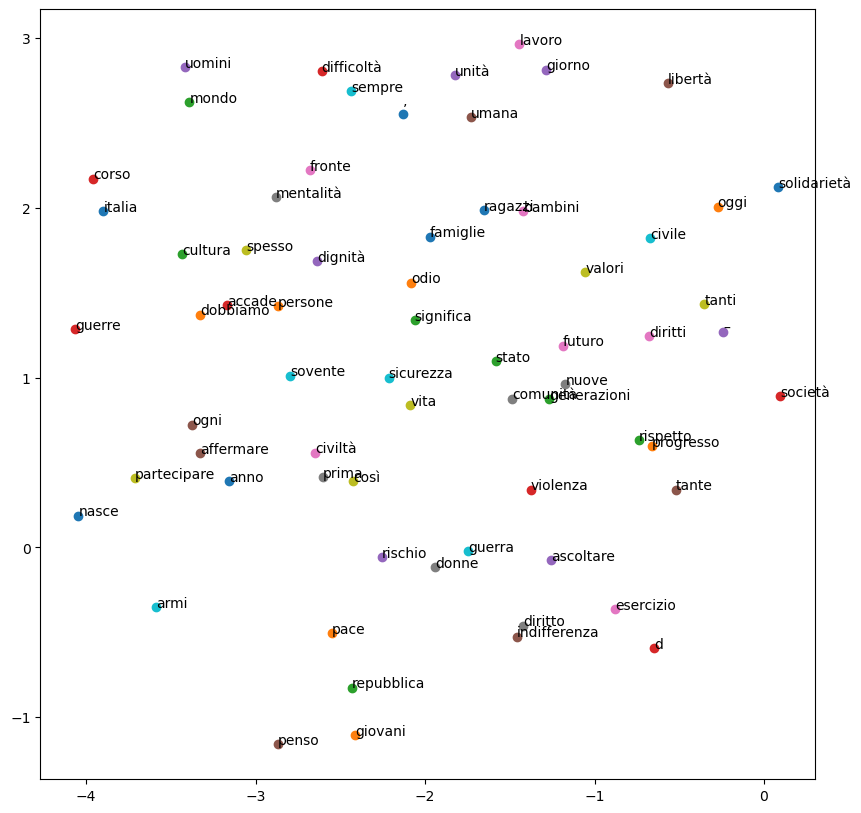

In [16]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Riduzione dimensionale
vettori = model.wv[model.wv.index_to_key]
print(len(model.wv.index_to_key))
tsne = TSNE(n_components=2, random_state=0)

vettori_ridotti = tsne.fit_transform(vettori)

# Visualizzazione
plt.figure(figsize=(10, 10))
for i, word in enumerate(model.wv.index_to_key):
    plt.scatter(vettori_ridotti[i, 0], vettori_ridotti[i, 1])
    plt.annotate(word, (vettori_ridotti[i, 0], vettori_ridotti[i, 1]))
plt.show()


In [17]:
from sklearn.cluster import KMeans

# Imposta il numero di cluster
num_clusters = 10

# Esegui il clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(vettori)

# Ottieni i cluster
clusters = kmeans.labels_


/home/acarugat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
# Raggruppa le parole per cluster
cluster_parole = {i: [] for i in range(num_clusters)}
for parola, cluster in zip(parole, clusters):
    cluster_parole[cluster].append(parola)

# Visualizza i cluster
for cluster, parole in cluster_parole.items():
    print(f"Cluster {cluster}: {parole}")


Cluster 0: ['significa', 'uomini', 'sicurezza', 'odio']
Cluster 1: ['’', 'penso', 'lavoro', 'famiglie', 'repubblica', 'ragazzi', 'dignità', 'bambini', 'difficoltà', 'giorno', 'mentalità', 'nasce']
Cluster 2: ['–', 'diritti', 'valori', 'tanti', 'solidarietà', 'stato', 'oggi']
Cluster 3: ['violenza', 'ascoltare', 'diritto', 'corso', 'esercizio', 'generazioni']
Cluster 4: ['società', 'progresso', 'd', 'tante', 'giovani', 'affermare', 'umana']
Cluster 5: ['libertà', 'italia', 'persone', 'spesso', 'guerra', 'cultura', 'mondo', 'partecipare', 'civile', 'dobbiamo', 'indifferenza', 'accade']
Cluster 6: ['futuro', 'donne', 'rispetto', 'nuove', 'unità', 'comunità', 'rischio']
Cluster 7: ['sempre', 'guerre', 'ogni', 'sovente', 'civiltà', 'fronte']
Cluster 8: ['pace', 'vita', 'prima', 'anno', 'così']
Cluster 9: ['armi']


Cluster 0: ['significa', 'uomini', 'sicurezza', 'odio']


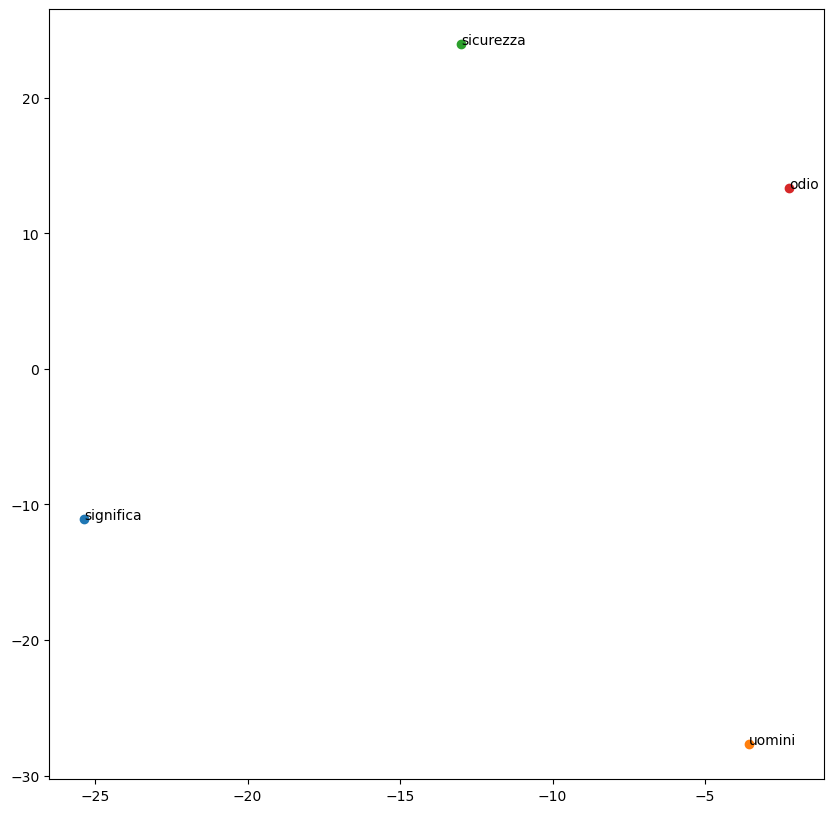

Cluster 1: ['’', 'penso', 'lavoro', 'famiglie', 'repubblica', 'ragazzi', 'dignità', 'bambini', 'difficoltà', 'giorno', 'mentalità', 'nasce']


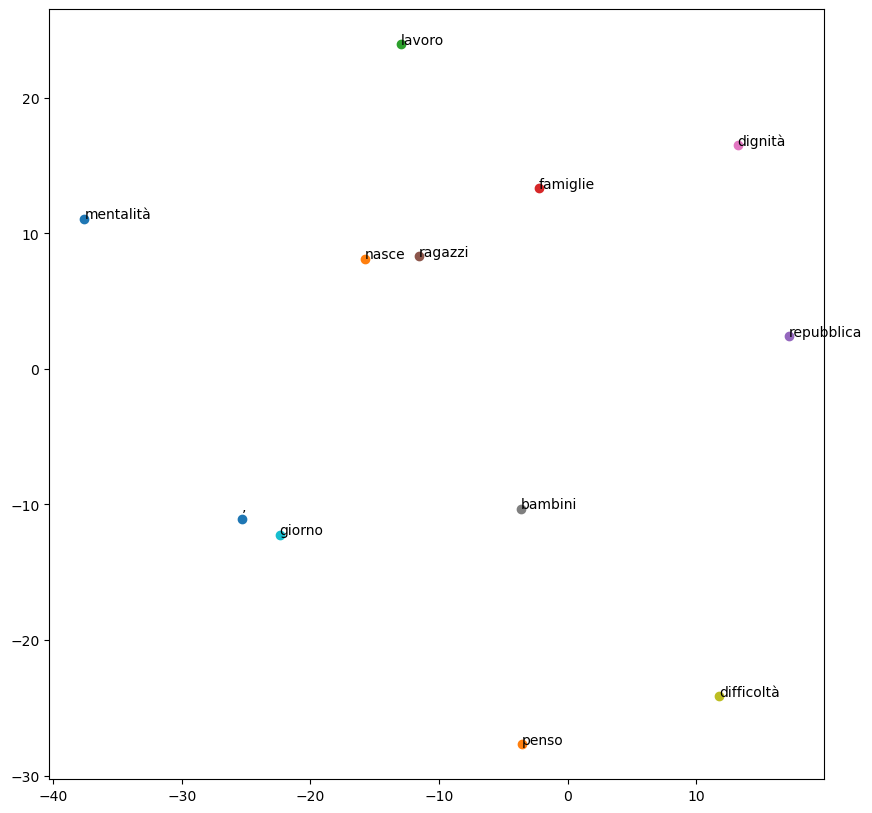

Cluster 2: ['–', 'diritti', 'valori', 'tanti', 'solidarietà', 'stato', 'oggi']


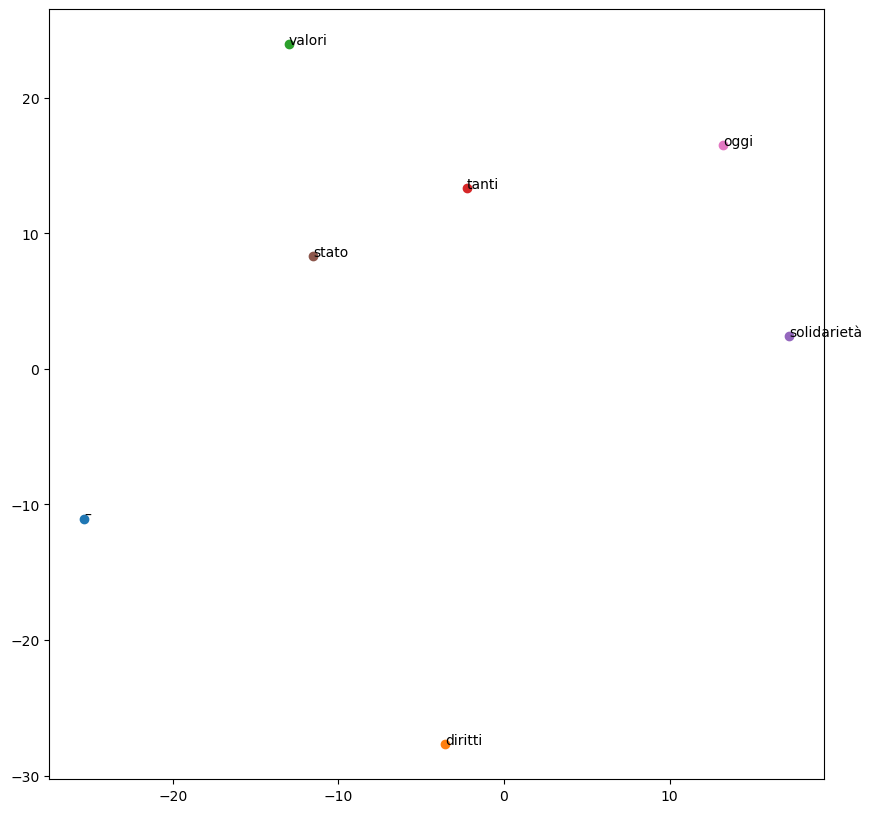

Cluster 3: ['violenza', 'ascoltare', 'diritto', 'corso', 'esercizio', 'generazioni']


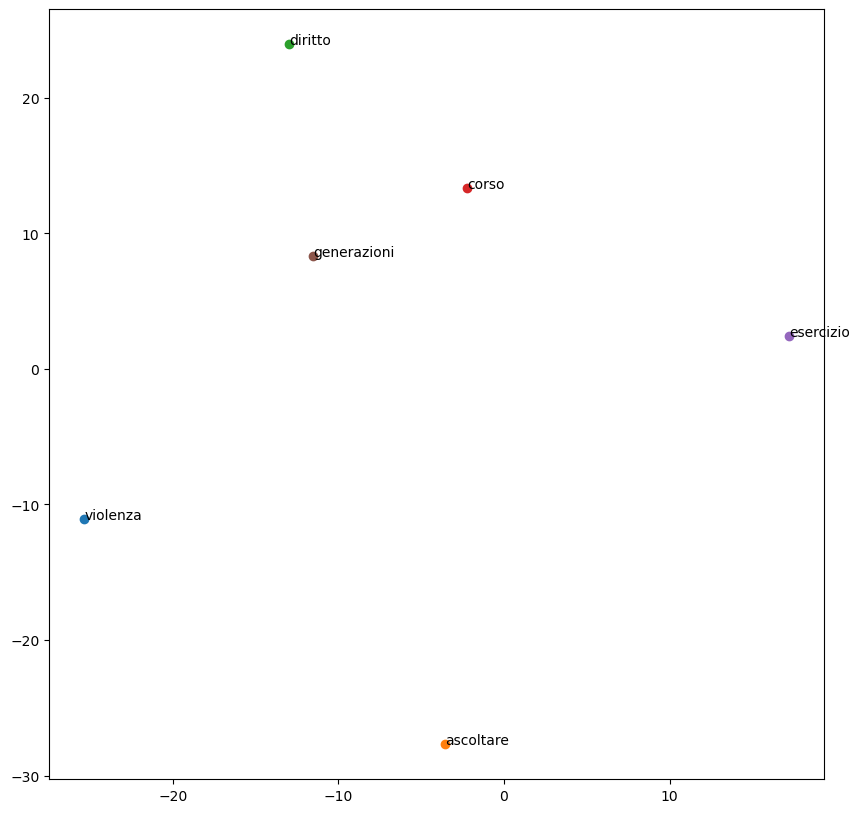

Cluster 4: ['società', 'progresso', 'd', 'tante', 'giovani', 'affermare', 'umana']


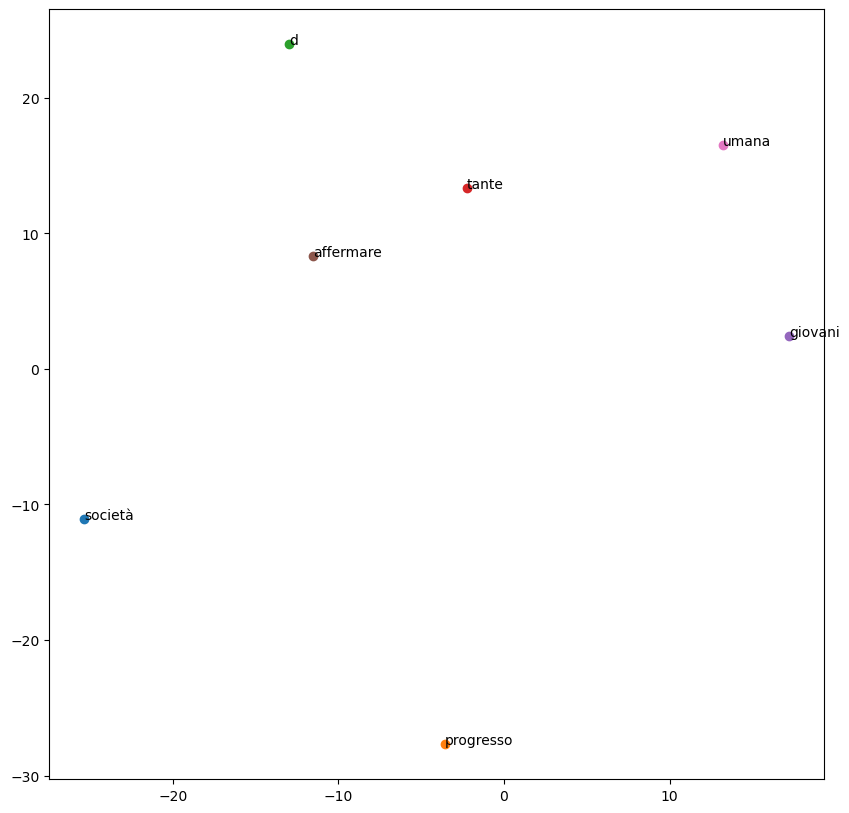

Cluster 5: ['libertà', 'italia', 'persone', 'spesso', 'guerra', 'cultura', 'mondo', 'partecipare', 'civile', 'dobbiamo', 'indifferenza', 'accade']


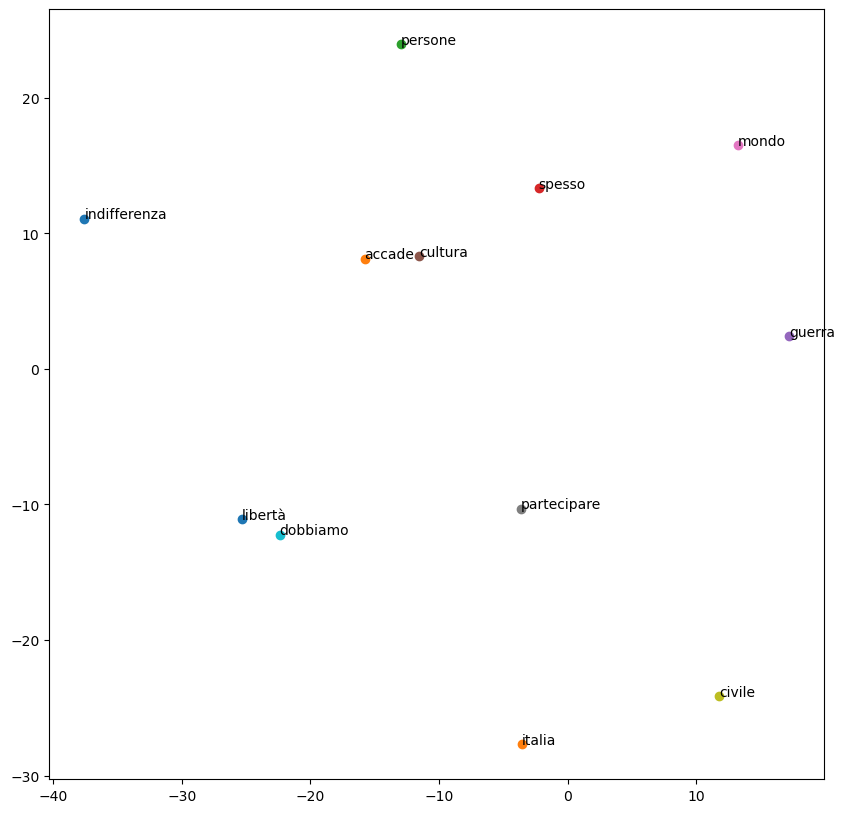

Cluster 6: ['futuro', 'donne', 'rispetto', 'nuove', 'unità', 'comunità', 'rischio']


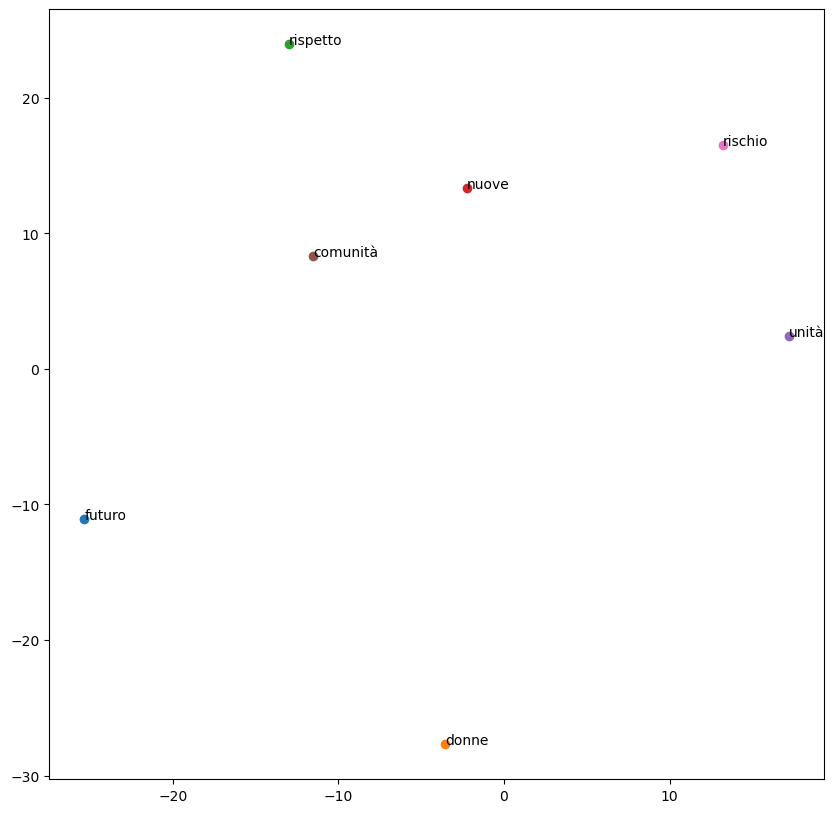

Cluster 7: ['sempre', 'guerre', 'ogni', 'sovente', 'civiltà', 'fronte']


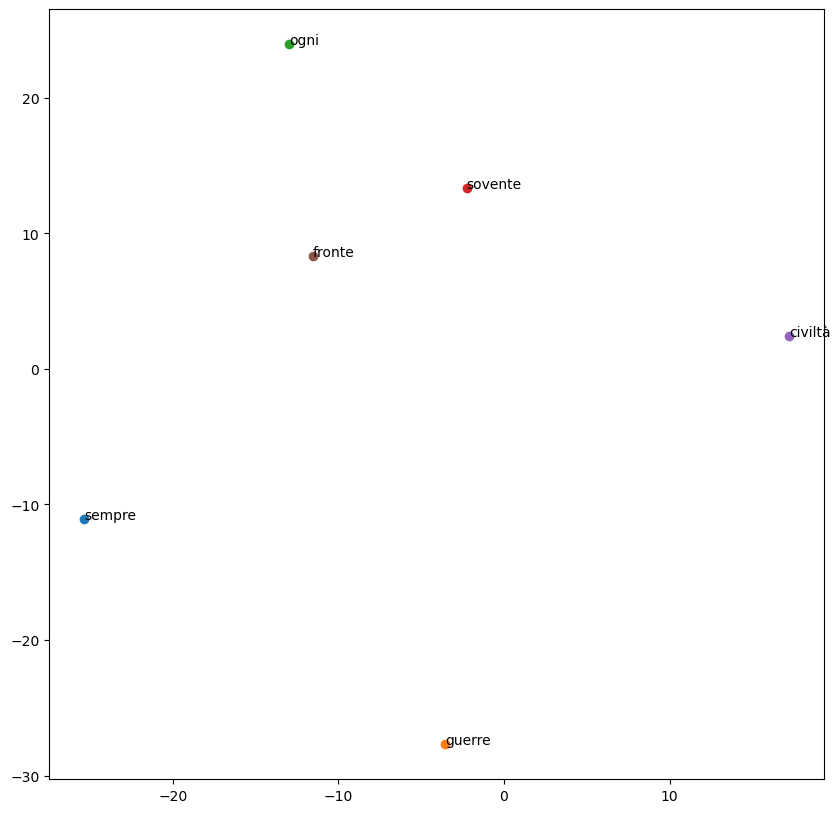

Cluster 8: ['pace', 'vita', 'prima', 'anno', 'così']


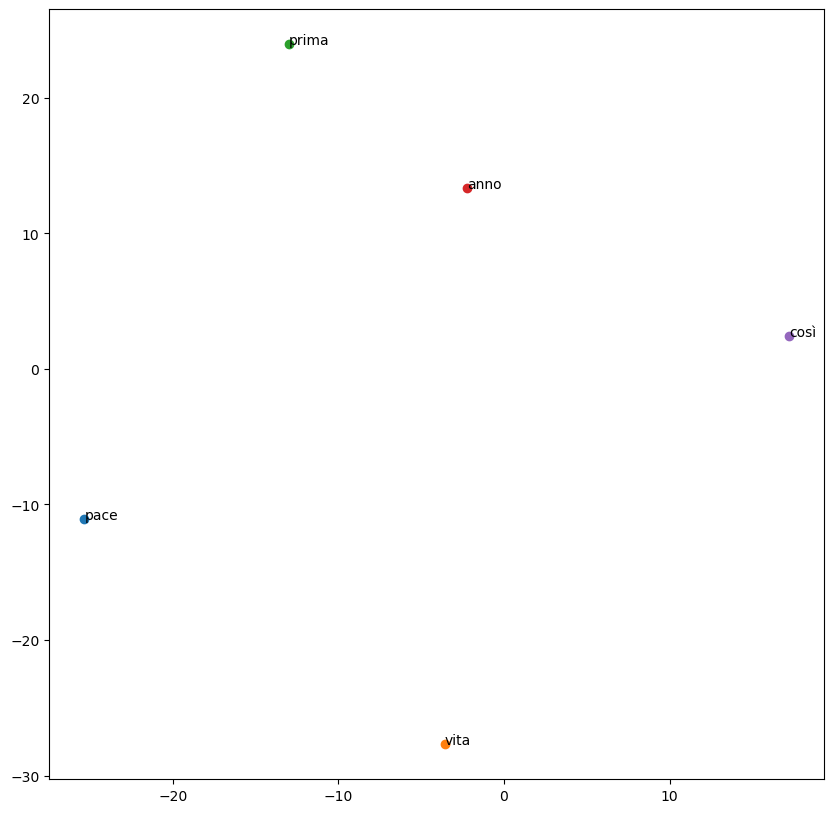

Cluster 9: ['armi']


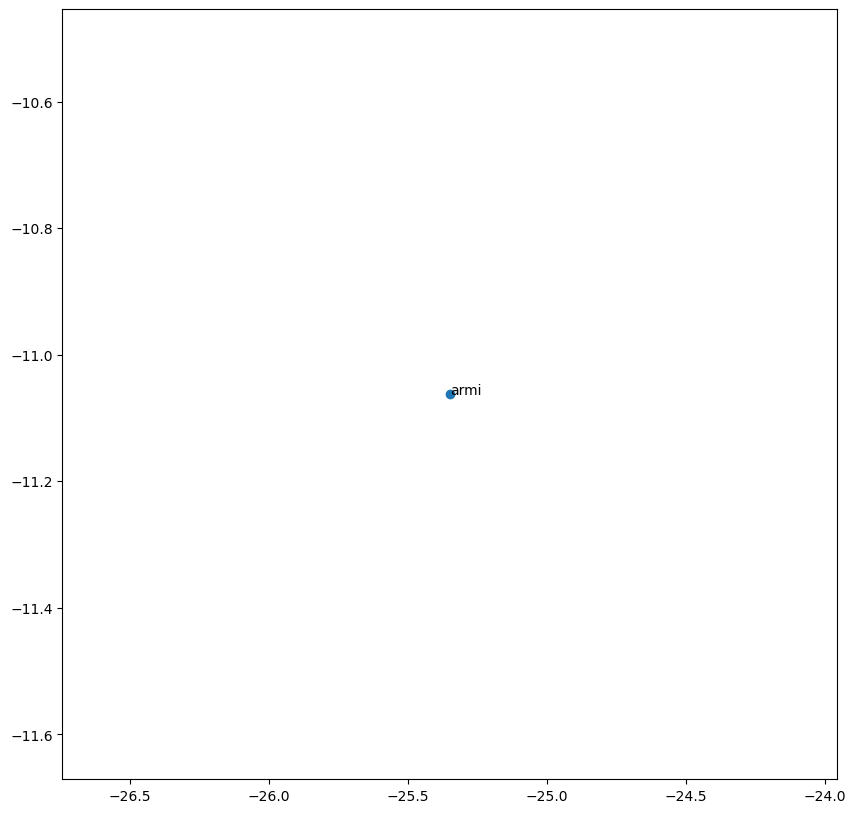

In [19]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Converti i vettori in un array NumPy
vettori_array = np.array(vettori)

# Riduzione dimensionale con t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=0)
vettori_ridotti = tsne.fit_transform(vettori_array)

# Visualizzazione
for cluster, parole in cluster_parole.items():
    print(f"Cluster {cluster}: {parole}")
    plt.figure(figsize=(10, 10))
    for i, parola in enumerate(parole):
        plt.scatter(vettori_ridotti[i, 0], vettori_ridotti[i, 1])
        plt.annotate(parola, (vettori_ridotti[i, 0], vettori_ridotti[i, 1]))
    plt.show()
